<a href="https://colab.research.google.com/github/drish420/DS-Project-1/blob/main/Knnproj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [28]:
dataset = pd.read_csv("/content/sample_data/mnist_train_small.csv")
dataset.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data = dataset.values[:15000]
data.shape

(15000, 785)

In [12]:
a, b = data[:,1:], data[:, 0]

In [13]:
a_train, a_test=a[:500],a[500:]
b_train,b_test=b[:500],b[500:]
print(a_train.shape, b_train.shape)
print(a_test.shape, b_test.shape)
print(b_train)
print(b_test)

(5000, 784) (5000,)
(10000, 784) (10000,)
[5 7 9 ... 8 2 5]
[1 9 5 ... 7 3 5]


<function matplotlib.pyplot.show>

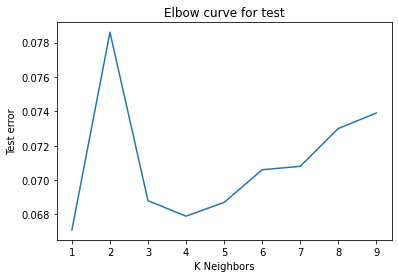

In [27]:
#Elbow Method
def elbow(k):

    
    error_test = []

   
    for i in k:
       
        model = knn(n_neighbors=i)
        model.fit(a_train,b_train)
         
        tmp =model.predict(a_test)
        tmp = metrics.accuracy_score(tmp,b_test)
        error = 1-tmp
        error_test.append(error)
    return error_test
k = range(1,10)
test = elbow(k)
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')
plt.show

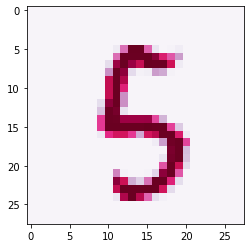

In [14]:
randomdigit=a[499]

randomdigit_img=randomdigit.reshape((28,28))
plt.figure()
plt.imshow(randomdigit_img,cmap='PuRd')
plt.show()

In [15]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(a_train,b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
model.score(a_test, b_test)

0.9313

In [17]:
test_data = dataset.values
test_images = test_data[:10]
test_images.shape


(10, 785)

In [18]:
prediction=model.predict([randomdigit])
print(prediction)

[5]
